In [1]:
library(tidyverse)

source('../utils/plottingUtilities.R')

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: scales

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor

Loading required package: gridExtra

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: grid


In [2]:
# original images 
x <- read.csv('../data/clean_x.csv')[, -1]

# Load instabilities

In [3]:
results_dir <- '../scripts/staNMFDicts/'

In [4]:
k1 <- 3 # smallest number for K
k2 <- 30 # largest number for K

In [5]:
stabilities <- c()
for(k in k1:k2){
    stability_file_k <- paste0(results_dir, 'K=', k, '/instability.csv')
    stabilities <- rbind(stabilities, 
                         read.csv(stability_file_k, sep = ',', header = FALSE))
}

colnames(stabilities) <- c('n_pp', 'instability')

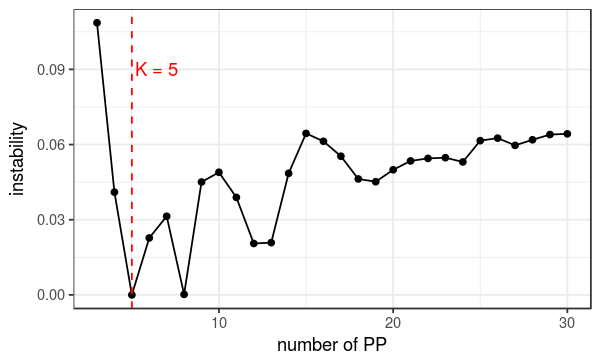

In [6]:
# plot instabilities as a function of K
options(repr.plot.width = 5, repr.plot.height = 3)
stabilities %>% 
    ggplot() + geom_point(aes(x = n_pp, y = instability)) + 
                geom_line(aes(x = n_pp, y = instability)) + 
        xlab('number of PP') + theme_bw() + 
        geom_vline(xintercept = 5, color = 'red', linetype = 'dashed') + 
        annotate("text", x=6.4, y=0.09, label= "K = 5", color = 'red')

# check out error in fit 

Here, we plot the l2 error in the fit as a function of the number of principal patterns

In [7]:
l2_errors <- data.frame(n_pp = c(), error = c())

for(k in k1:k2){
    alpha <- read.csv(paste0(results_dir, '/K=', k, '/alpha_99.csv'))[, -1]
    dict <- read.csv(paste0(results_dir, '/K=', k, '/factorization_99.csv'), header = FALSE)[, -1]

    residual <- x - as.matrix(dict) %*% as.matrix(alpha)
    error <- sum(residual**2)
        
    l2_errors <- rbind(l2_errors, data.frame(n_pp = k, error = error))
}

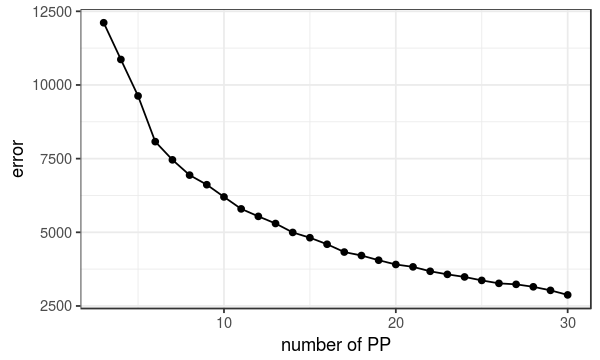

In [8]:
options(repr.plot.width = 5, repr.plot.height = 3)
l2_errors %>% 
    ggplot() + geom_point(aes(x = n_pp, y = error)) + 
                geom_line(aes(x = n_pp, y = error)) + 
        xlab('number of PP') + theme_bw()

look at individual errors

In [9]:
corr_df <- data.frame(n_pp = c(), corr = c(), gene = c())

for(k in k1:k2){
    alpha <- read.csv(paste0(results_dir, '/K=', k, '/alpha_99.csv'))[, -1]
    dict <- read.csv(paste0(results_dir, '/K=', k, '/factorization_99.csv'), header = FALSE)[, -1]

    correlation <- diag(cor(x, as.matrix(dict) %*% as.matrix(alpha)))
        
    corr_df <- rbind(corr_df, data.frame(n_pp = k, 
                                             error = as.vector(correlation), 
                                             gene = names(correlation)))
}

Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”Warning message in cor(x, as.matrix(dict) %*% as.matrix(alpha)):
“the standard deviation is zero”Warning message in cor(x, as.m

Warning message:
“Removed 665 rows containing non-finite values (stat_boxplot).”

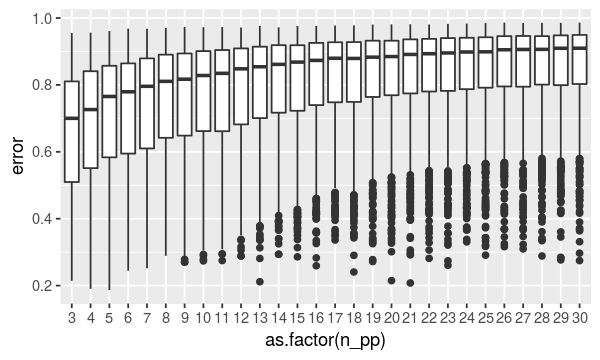

In [10]:
corr_df %>% 
    ggplot() + geom_boxplot(aes(x = as.factor(n_pp), y = error))

# Check out PPs

In [7]:
# need the template
load('../data/lateData.Rdata')

[1] 1 2 3 4 5

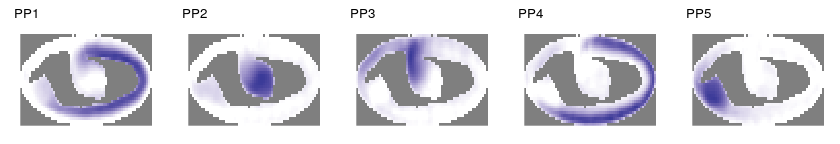

In [8]:
# choose a K
K <- 5

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 1.2)

plot_all_PPs(PPs[, -1], late$x)

[1] 1 2 3 4 5 6 7 8

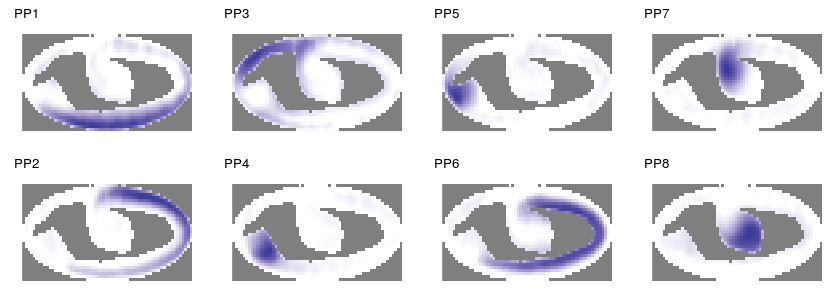

In [9]:
### choose a K
K <- 8

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 2.5)

plot_all_PPs(PPs[, -1], late$x, ncols = 4)

[1]  1  2  3  4  5  6  7  8  9 10 11 12

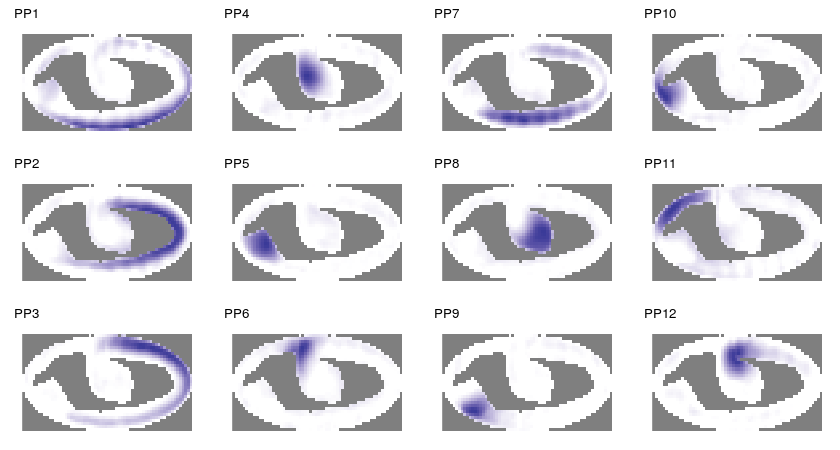

In [10]:
### choose a K
K <- 12

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 2.5*1.5)

plot_all_PPs(PPs[, -1], late$x, ncols = 4)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13

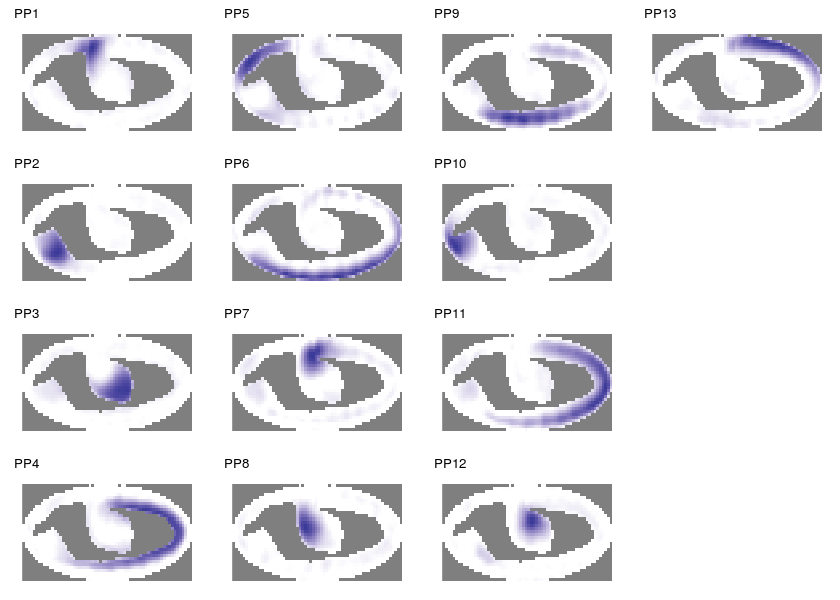

In [11]:
### choose a K
K <- 13

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 5)

plot_all_PPs(PPs[, -1], late$x, ncols = 4)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19

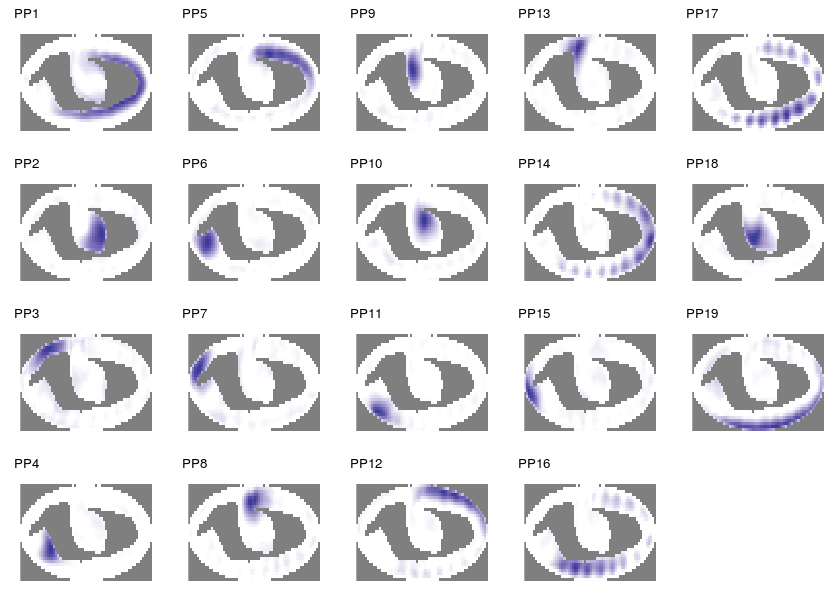

In [12]:
# choose a K
K <- 19

# read in dictionary 
# for now, we just pick any restart ... 
pp_file_k <- paste0(results_dir, 'K=', K, '/factorization_99.csv')
PPs <- read.csv(file = pp_file_k, header = FALSE)

options(repr.plot.width = 7, repr.plot.height = 5)

plot_all_PPs(PPs[, -1], late$x)

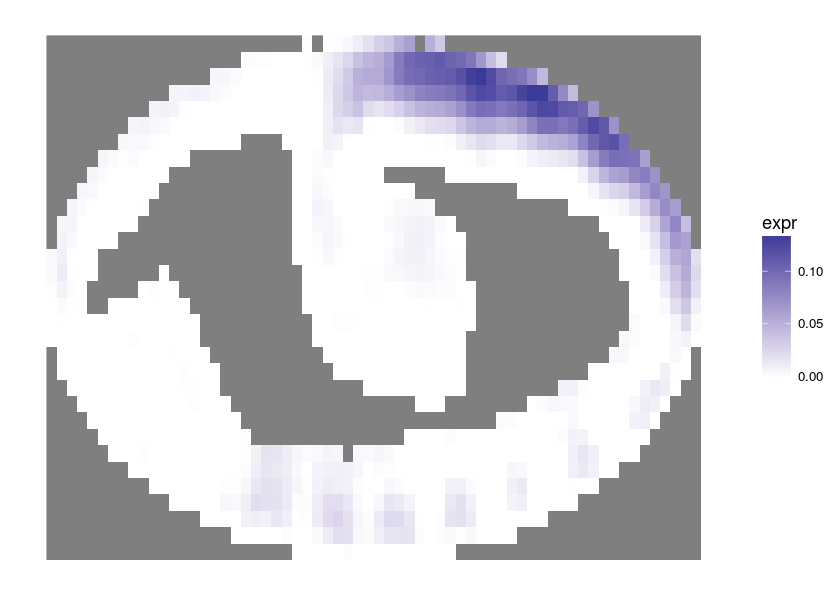

In [16]:
plotImg(PPs[, -1][, 12], late$template, TRUE)

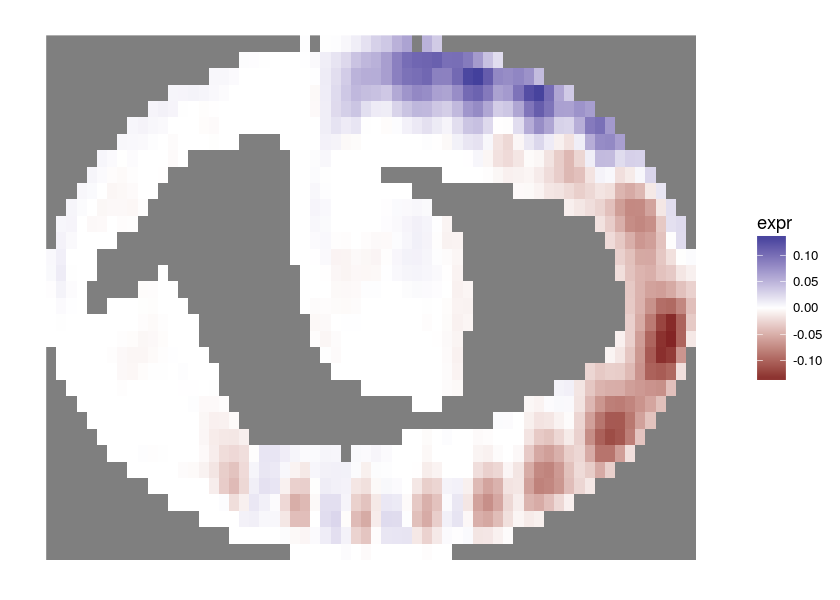

In [27]:
plotImg(PPs[, -1][, 12] - PPs[, -1][, 14], late$template, TRUE)

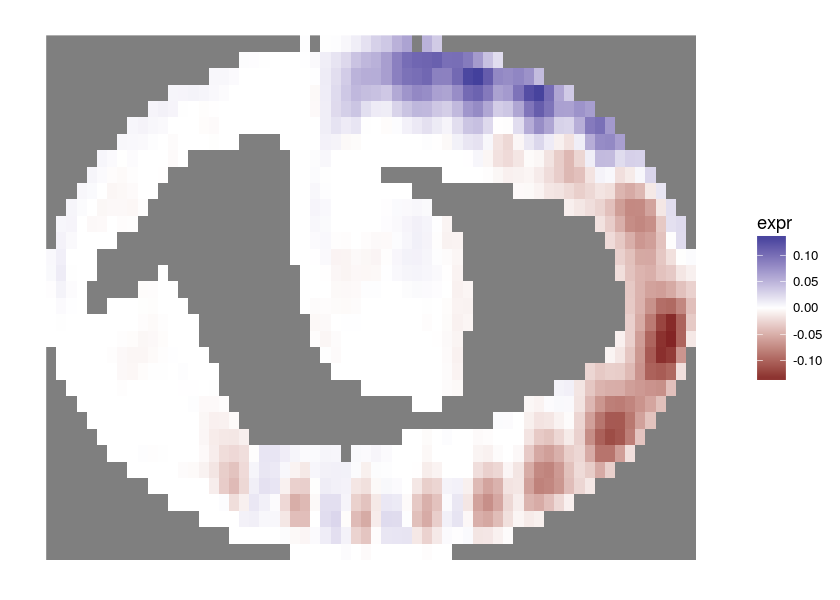

In [17]:
plotImg((PPs[, -1][, 12]) - (PPs[, -1][, 14]), late$template, TRUE)

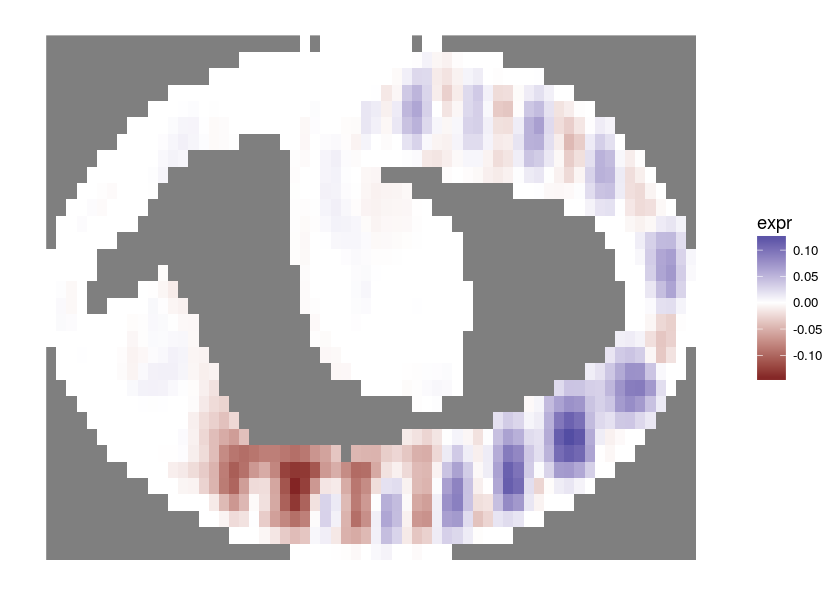

In [22]:
plotImg((PPs[, -1][, 17]) - (PPs[, -1][, 16]), late$template, TRUE)

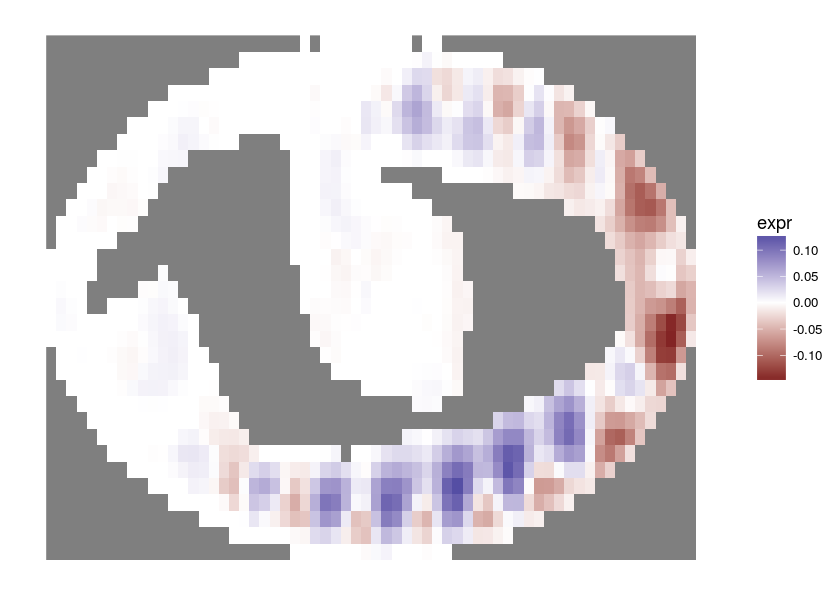

In [23]:
plotImg((PPs[, -1][, 17]) - (PPs[, -1][, 14]), late$template, TRUE)

# Pull gene lists

In [31]:
alpha <- read.csv(paste0(results_dir, '/K=', 19, '/alpha_99.csv'))[, -1]

In [32]:
dict <- read.csv(paste0(results_dir, '/K=', 19, '/factorization_99.csv'), header = FALSE)[, -1]

In [33]:
reconstruction <- as.matrix(dict) %*% as.matrix(alpha)

In [34]:
# normalize coefficients 
normalize_vec <- function(x){
    return(x / sum(x))
}

In [35]:
alpha_normalized <- apply(alpha, 2, normalize_vec)

In [36]:
for(i in 1:dim(alpha_normalized)[1]){
    coeffs <- alpha_normalized[i, ]
    
    coeffs <- coeffs[!is.na(coeffs)]
    coeffs <- coeffs[coeffs > 0.5]
    coeffs <- sort(coeffs, decreasing = TRUE)
    
    coeffs
    
    print(i)
    cat(paste(names(coeffs)))
    cat('\n')
    cat('\n')
}

[1] 1
wgn bap CG12744 net.1 tin eya_2.1 CG6398 twi_1

[1] 2
Ugt36Bc.2 piwi CG9925 Chd64 CG32243 Rel.1 Ptx1 aret CG7224 Ugt36Bc.1 m2 exex CG9467 CG9232 Pdp1 ebi_1 ttk_2 Pdp1.1 gem Thor term_2

[1] 3
eya_1.1 Tkr eya_1 tll

[1] 4
Dip.C su.r. Tapdelta su.r..1 CG32423 gcm2 vri Dr_3.1 gcm_2 CrebA RhoL Dp1 ppl Oscillin.1 CG32423.1 Hel89B CG32423.2 Oscillin srp_1

[1] 5
Him CG12489_2 trh

[1] 6
GlcAT.P gcm_1 toy CG7966 CG6070 ham CG3597 CG4322 ttk_1 dve CG3036 Grp1

[1] 7
Optix Egfr

[1] 8
prd_1 dpn_1 CG11648 ken

[1] 9
prd_2 prd_3 otp_3 noc otp_5 byn fng CG5888 CG10176.2 lmd otp_2 byn.1 cad CG17390

[1] 10
HLH54F.3 Grip HLH54F HLH54F.2 HLH54F.1 CG8745 CG5295 CG13290 for..2

[1] 11
NetB lab_1 kn cnc Dfd kn.1 Mvl Dr_3 kn.2 HGTX_1

[1] 12
ey ey.1 rho l.3.82Fd_1 Uev1A dnc unpg CG2865 Sulf1.1

[1] 13
pgc CG9520 Ance_2 tup_2 kay otp_4 CG11275

[1] 14
CG8654

[1] 15
Wnt4 CG8388 CG12537 Wnt4.1 for. croc.1 croc

[1] 16
Scr.2 Scr Tulp eyg CG2083 nerfin.1 CG12489_1

[1] 17
ara Ubx en

[1] 18
skl.1 CG830

# example of a reconstruction

In [37]:
ls()

[1] "alpha"            "alpha_normalized" "coeffs"           "dict"            
 [5] "generateImage"    "getNodeImages"    "getNodeLabel"     "getNodePosition" 
 [9] "i"                "img2Color"        "k"                "K"               
[13] "k1"               "k2"               "late"             "mapLate2Early"   
[17] "multiplot"        "normalize_vec"    "overlayImage"     "overlayImages"   
[21] "p"                "plot_all_PPs"     "plotGroupImg"     "plotImg"         
[25] "plotPP"           "pp_file_k"        "PPs"              "reconstruction"  
[29] "results_dir"      "shiftHoriz"       "shiftImg"         "shiftVert"       
[33] "stabilities"      "stability_file_k" "tf"               "which_gene"      
[37] "x"

In [38]:
which_gene <- 'en'

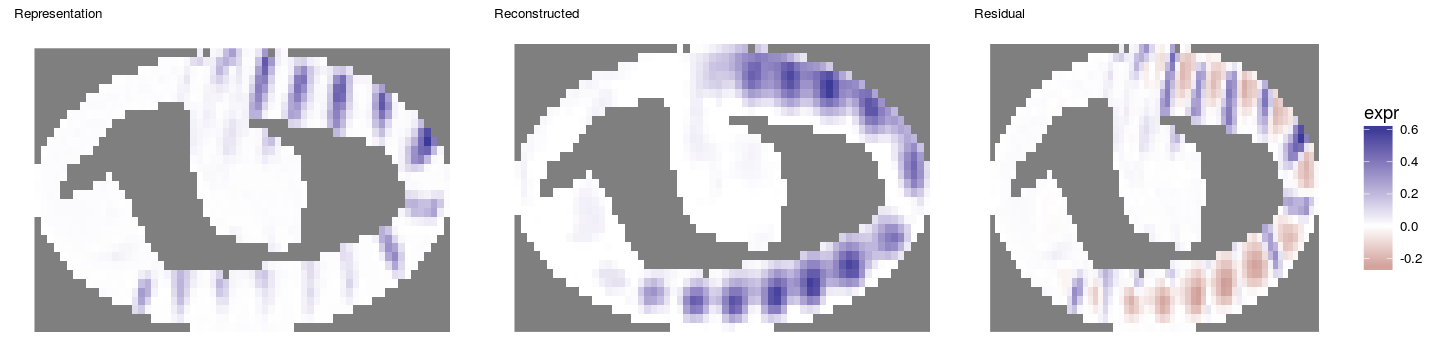

In [62]:
options(repr.plot.width = 12, repr.plot.height = 3)
p <- list()
p[[1]] <- plotImg(late$x[, which_gene], late$template, FALSE, 'Representation')
p[[2]] <- plotImg(reconstruction[, which_gene], late$template, FALSE, 'Reconstructed')
p[[3]] <- plotImg(late$x[, which_gene] - reconstruction[,which_gene], late$template, TRUE, 'Residual')

multiplot(plotlist = p, cols = 3)

In [64]:
sum((late$x[, which_gene] - reconstruction[,which_gene])**2)

[1] 13.21719

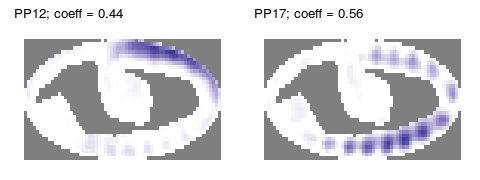

In [41]:
which_dict <- which(alpha_normalized[, which_gene] > 0)

p <- list()
for (i in 1:length(which_dict)){
    p[[i]] <- plotImg(dict[, which_dict[i]], late$template, FALSE, 
                      paste0('PP', which_dict[i], '; coeff = ', 
                             round(alpha_normalized[which_dict[i], which_gene], 2)))
}

options(repr.plot.width = 2 * length(which_dict), repr.plot.height = 1.5)
multiplot(plotlist = p, cols = length(which_dict))

In [51]:
library(glmnet)

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand

Loading required package: foreach

Attaching package: ‘foreach’

The following objects are masked from ‘package:purrr’:

    accumulate, when

Loaded glmnet 2.0-16



In [52]:
foo = glmnet(y = late$x[, which_gene], x = as.matrix(dict[, c(14, 16)]), lambda = 0.0)

In [53]:
recon2 = as.matrix(dict[, c(14, 16)]) %*% as.matrix(foo$beta)

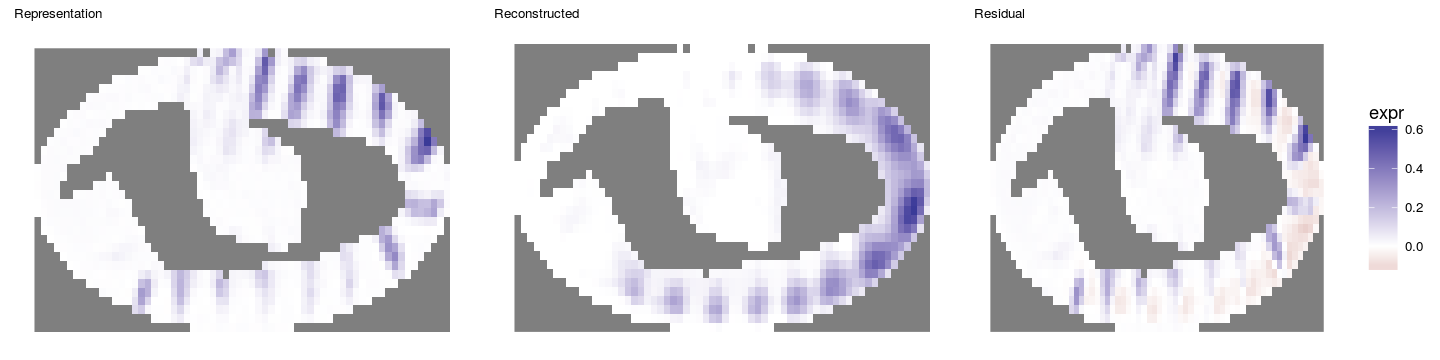

In [55]:
options(repr.plot.width = 12, repr.plot.height = 3)
p <- list()
p[[1]] <- plotImg(late$x[, which_gene], late$template, FALSE, 'Representation')
p[[2]] <- plotImg(recon2, late$template, FALSE, 'Reconstructed')
p[[3]] <- plotImg(late$x[, which_gene] - recon2, late$template, TRUE, 'Residual')

multiplot(plotlist = p, cols = 3)

In [59]:
foo$beta / sum(foo$beta)

2 x 1 sparse Matrix of class "dgCMatrix"
            s0
V15 0.92288604
V17 0.07711396

In [56]:
which_dict <- c(14, 16)

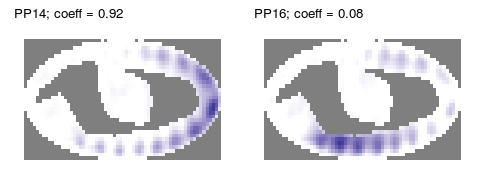

In [61]:
p <- list()
for (i in 1:length(which_dict)){
    p[[i]] <- plotImg(dict[, which_dict[i]], late$template, FALSE, 
                      paste0('PP', which_dict[i], '; coeff = ', 
                             round(foo$beta[i] / sum(foo$beta), 2)))
}

options(repr.plot.width = 2 * length(which_dict), repr.plot.height = 1.5)
multiplot(plotlist = p, cols = length(which_dict))

In [65]:
sum((late$x[, which_gene] - recon2)**2)

[1] 13.85364